Angle Solution: 85.0 degrees
Width Solution: 0.01 m
Height Solution: 0.01 m
Deflection Solution: 0.0004346762417524339 m
Length Solution: 0.1 m
Force In Solution: 32.999998241862706 N
Force Out Solution: 66.0 N
Force Location: 0.09996197075654262 m
small angle assumption: 0.004348416087264705



C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minimize.py:569: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


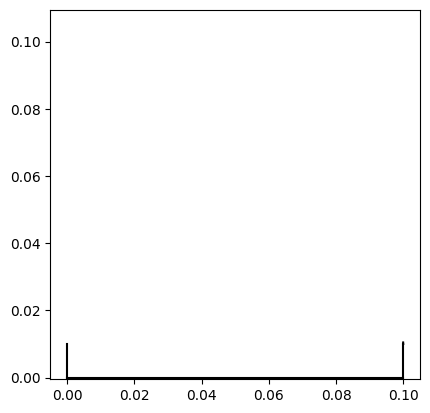

In [44]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

# Define your equations as the objective function (sum of squared residuals)
def objective_in(vars, friction_coefficient, elastic_modulus):

    angle_rad, width_beam, height_beam, deflection, length_beam, force_hand_in, force_hand_out = vars

    I_beam = (width_beam * height_beam**3) / 12

    force_location = length_beam - deflection / np.tan(angle_rad)

    # First equation
    eq1 = ((3 * elastic_modulus * I_beam) / (force_location**3)) * deflection * (friction_coefficient * np.cos(angle_rad) + np.sin(angle_rad)) / (friction_coefficient * np.sin(angle_rad) + np.cos(angle_rad)) - force_hand_in
    # Second equation
    eq2 = (2 * elastic_modulus * I_beam / force_location**2) - force_hand_out

    return eq1**2 + eq2**2

# Define constraints between parameters
def constraint1(vars):
    angle_rad, width_beam, height_beam, deflection, length_beam, force_hand_in, force_hand_out = vars

    # Example constraint: length must be at least twice the width
    return (length_beam - (deflection / np.tan(angle_rad))) - 0.5 * length_beam

# Define constraints between parameters
def constraint2(vars):
    angle_rad, width_beam, height_beam, deflection, length_beam, force_hand_in, force_hand_out = vars

    # Example constraint: length must be at least twice the width
    return 0.85 * length_beam - (length_beam - (deflection / np.tan(angle_rad)))

def constraint3(vars):
    angle_rad, width_beam, height_beam, deflection, length_beam, force_hand_in, force_hand_out = vars

    # Example constraint: length must be at least twice the width
    return deflection - (length_beam - (deflection / np.tan(angle_rad))) * 1e-3

def constraint4(vars):
    angle_rad, width_beam, height_beam, deflection, length_beam, force_hand_in, force_hand_out = vars

    # Example constraint: length must be at least twice the width
    return (length_beam - (deflection / np.tan(angle_rad))) * 0.1 - deflection

# Constraints dictionary for minimize
# constraints = [{'type': 'ineq', 'fun': constraint1}]
constraints = [{'type': 'ineq', 'fun': constraint1},{'type': 'ineq', 'fun': constraint2},{'type': 'ineq', 'fun': constraint3},{'type': 'ineq', 'fun': constraint4}]

# Function to enforce angle constraints using minimize
def constrained_solve_minimize_in(initial_guess, coefficient_friction, elastic_modulus):
    # Bounds for the variables: angle between 0 and pi/2 (0 to 90 degrees in radians)
    bounds = [(np.deg2rad(5), np.deg2rad(85)), (1e-2,1e-1), (1e-2,1e-1), (0,None), (1e-2,1e-1), (22*.5, 22*1.5), (44*.5, 44*1.5)]  # Angle in radians, force_normal unbounded
    
    # Minimize the objective function with constraints
    result = minimize(
        objective_in,
        initial_guess,
        args=(coefficient_friction, elastic_modulus),
        bounds=bounds,
        constraints=constraints,
        method='L-BFGS-B'  # Suitable for bounded problems
    )
    
    return result.x

# Example input parameters
coefficient_friction = 0.5
elastic_modulus = 2900e6

# Initial guess for [angle, force_normal]
initial_guess = [np.deg2rad(40), 2e-2, 0.2e-2, 0.001, 0.05, 22, 44]  # Initial angle in radians and force_normal

# Solve the system with minimize
solution = constrained_solve_minimize_in(initial_guess, coefficient_friction, elastic_modulus)
angle_solution_rad, width_solution, height_solution, deflection_solution, length_solution, force_in_solution, force_out_solution = solution

# Convert angle to degrees for output
angle_solution_degrees = np.degrees(angle_solution_rad)

force_location = length_solution - deflection_solution / np.tan(angle_solution_rad)

print(f"Angle Solution: {angle_solution_degrees} degrees")
print(f"Width Solution: {width_solution} m")
print(f"Height Solution: {height_solution} m")
print(f"Deflection Solution: {deflection_solution} m")
print(f"Length Solution: {length_solution} m")
print(f"Force In Solution: {force_in_solution} N")
print(f"Force Out Solution: {force_out_solution} N")
print(f"Force Location: {force_location} m")
print(f"small angle assumption: {deflection_solution/force_location}")
print()
#calculate again


plt.figure()
plt.plot([length_solution,0],[0,0],'black')
plt.plot([0,0],[0,height_solution],'black')
plt.plot([length_solution,length_solution],[0,height_solution],'black')
plt.plot([length_solution,force_location],[height_solution,height_solution+deflection_solution],'black')
# plt.plot([0,rampup_location],[height_solution,height_solution],'black')
# plt.plot([rampup_location,force_location_solution],[height_solution,height_solution+height_solution/2],'black')
plt.axis('square')
plt.show()



